### Cleaned Listings

In [585]:
df_with_is_na.to_csv('./listings_clean.csv')

In [668]:
[col for col in df_with_is_na.columns if 'price' in col]

['price']

In [669]:
# df_with_is_na.

from sklearn.model_selection import train_test_split

In [670]:
X = df_with_is_na.drop('price', axis = 1)

In [671]:
y = df_with_is_na['price']

In [672]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y)

In [673]:
from sklearn.linear_model import LinearRegression

In [674]:
model = LinearRegression()

In [675]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [676]:
model.score(X_validate, y_validate)

-0.09045397717344539

### Permutation Importance

In [681]:
from eli5.sklearn import PermutationImportance
import eli5

perm = PermutationImportance(model).fit(X_validate, y_validate)

exp_df = eli5.explain_weights_df(perm, feature_names = list(X_train.columns))
# exp_df

In [684]:
# exp_df

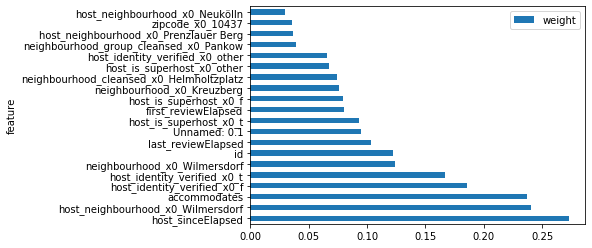

In [727]:
exp_df[:20].plot.barh(x = 'feature', y = 'weight')

In [708]:
top_cols = exp_df[exp_df['weight'] > .005]

In [709]:
top_cols.shape

(48, 3)

In [710]:
# exp_df['weight']

In [711]:
model = LinearRegression()
model.fit(X_train[top_cols.feature], y_train)
model.score(X_validate[top_cols.feature], y_validate)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-0.03485493393262051

In [714]:
idcs = list(range(2, 100))
models = [LinearRegression().fit(X_train[exp_df[:i].feature.tolist()], y_train) for i in idcs]
scores = [ model.score(X_validate[exp_df[:i].feature.tolist()], y_validate) for model, i in zip(models, idcs)]

In [715]:
# X_validate[exp_df[:10].feature.tolist()]

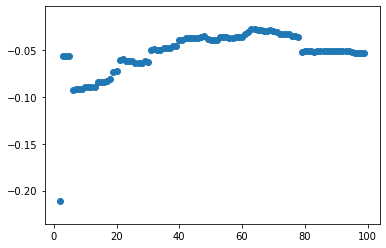

In [717]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x = range(2, 100), y = scores)

In [618]:
top_feats = exp_df[:42].feature.tolist()

In [718]:
model = LinearRegression()

In [722]:
# model.fit(X_top_feats, y_train)

In [721]:
# model.score(X_validate[top_feats], y_validate)

In [726]:
from eli5.sklearn import PermutationImportance
import eli5

# perm = PermutationImportance(model).fit(X_validate[top_feats], y_validate)

# exp_df = eli5.explain_weights_df(perm, feature_names = top_feats)
# exp_df[:10]

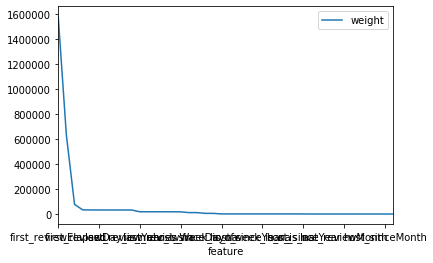

In [433]:
exp_df.plot(x = 'feature', y = 'weight')